In [36]:
!ls

CY_train.csv
CY_train_Cleanned.csv
Final_Test.csv
Final_TestWithPredict.csv
HowBuildW2Vec
NLP-SENTEMENT ANALYSIS.html
NLP-SENTEMENT ANALYSIS.ipynb
SentimentModels


**Steps for Text preprocessing in such task:**

**1.Remove Noisy Data.**

**2.Break each comment into sentences.**

**3.Tokenize or break each sentence into words**

**4.Transform words into vectors: -**

  - There are many methods to convert words into vectors as following: -
   - Bag of words (BoW)
   - TF-IDF
   - Word2Vec
   - Glove

***We can consider the last three methods [TF-IDF, Word2Vec & Glove] as word embedding which defined as a vector representations of a particular word. BoW introduced limitations such as large feature dimension, sparse representation***

**Import needs libraries**

In [37]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import numpy as np
#from pyarabic.araby import strip_tashkeel 
import re
from tqdm import tqdm
from sklearn.model_selection import validation_curve
from nltk.corpus import stopwords
from nltk.stem.isri import ISRIStemmer # arabic stemming

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, model_from_json
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers,metrics
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM,Embedding, SimpleRNN, GRU, Bidirectional, GlobalMaxPool1D,AveragePooling1D,GlobalAveragePooling1D
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.feature_extraction import text
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from gensim.models import Word2Vec, KeyedVectors
#from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.layers import concatenate
import tensorflow.keras as K
from tensorflow.keras.models import load_model
import joblib


In [38]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth',None)

In [39]:
CY_train=pd.read_csv("CY_train.csv")
CY_train.info()  # there are about 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2746 entries, 0 to 2745
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   2746 non-null   object
 1   class   2746 non-null   object
dtypes: object(2)
memory usage: 43.0+ KB


In [40]:
len(CY_train)

2746

In [41]:
CY_train.head(200)

,tweet,class
0,' فينو الاهبل ابن الاهبل ',neg
1,' على المصرييييين وجمالهم ربنا يحميهم #MinaAtta http://t.co/NkOvSx6mgD ',pos
2,' @Kholoudkewan دول كتير اوى ودمهم خفيف العمارة اللي انا فيها كلها سوريين والأطفال عسل ',pos
3,' انا بعد كده خلى اللى يوعنى بحاجه همضى على وصل امانه علشان اضمن انو مش يخون ',neg
4,' انا هنتحر ',neg
5,' في حفظ الله يا ريس http://t.co/RGKtP9QHZB ',pos
6,' يا عيون عطشان عطشانة سهر يا قلوب تعبانة تعبانة سفر كتروا من الحب تلاقوا تلاقوا في الضلمة ألف قمر ',pos
7,' #زهقنا_من اسامي اكونتات البنات على مواقع التواصل الاجتماعي زي مثلا شروق الشمس و الذهب الأزرق و أي بطيخ و السلام ',neg
8,' @Omarr793 حمد الله ع السلامة ✋ ',pos
9,' @ahmedeslam07 أحا مين ؟! ',neg


In [42]:
#select test data
df_subset = CY_train.sample(400,random_state=42)
CY_train=CY_train.drop(df_subset.index)
CY_train.reset_index(inplace=True)
CY_train=CY_train.drop(['index'],1)
len(CY_train)

2346

In [43]:
df_subset.reset_index(inplace=True)
df_subset=df_subset.drop(['index'],1)
df_subset.to_csv('Final_Test.csv',index=0)

In [44]:
df_Test=pd.read_csv("Final_Test.csv")

CY_trainTest=df_Test #for test the input
CY_trainTest.head()

,tweet,class
0,' @MaRwaEltantawy1 @MennaAshraf38 صح جدآ :( ',pos
1,' @muhamsalah صباحك ود وصفاء ',pos
2,' ربنا ينتقم من كل ظالم #معتقلي_الاتحادية ',neg
3,' مطلعين فرسة من صالة المطار قدامى .. ايه الجمال دا ',pos
4,' شهر(4) أكتر أكلة مفضلة عندك؟؟ ',neg


**clean text**

In [45]:
def clean_text(text):
    # remove tashkeel
    #text = strip_tashkeel(text)
    # text = qalsadi.lemmatizer.Lemmatizer(text)
    # remove repeated
    text = re.sub(r'(.)\1+', r'\1\1', text)
    text = text.replace('اا', 'ا').replace('وو', 'و').replace('يي', 'ي').replace('رر', 'ر')
    text = re.sub(r'((?<=\A)|(?<=\s))هه(?=\s|\Z)', r'ضحك', text)
    text = re.sub(r'ـ', '', text)
    # remove punctuations
    text = re.sub(r'[^\w\sؠ-ي١-٩]', ' ', text) # replace \w with \d to filter english letters
    text = re.sub(r'_', ' ', text)
    text = re.sub(r'/n', ' ', text)
    # unifying similar letters
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub('علے', 'على ', text)
    text = re.sub(r'ے', '', text)
    text = re.sub("[ؠىي]", "ي", text)
    # text = re.sub("يئ", "يء", text)
    text = re.sub("[ئؽؾؿ]", "ئ", text)# ء
    # text = re.sub("ؤ", "ء", text)
    # text = re.sub("ة", "ه", text)
    text = re.sub("[ؼػگ]", "ك", text)
    # separate negation signs
    text = re.sub(r'ما(\w+)ش', r'ما \1', text)
    text = re.sub(r'((?<=\A)|(?<=\s)|(?<=و))مش(?=\s)', r'ما', text)
    text = re.sub(r'((?<=\A)|(?<=\s)|(?<=و))ليش(?=\s)', r'ليه', text)
    text = re.sub(r'((?<=\A)|(?<=\s)|(?<=و))يا(?=\w)', r'يا ', text)
    text = re.sub('شاءالله', ' شاء الله', text)
    # remove slang begin marks
    text = re.sub(r'((?<=\A)|(?<=\s))ه(?=[ايت])', '', text)
#     text = re.sub('((?<=\s)|(?<=\A))(\w?ال)(?=\w{3,})', '', text)
#     text = re.sub('((?<=\s)|(?<=\A))(لل)(?=\w{3,})', '', text)
    # text = re.sub(r'((?<=\A)|(?<=\s))ب(?=[ايت])', '', text)
    # text = re.sub(r'((?<=\A)|(?<=\s))ا(?=[يت])', '', text)
    text = re.sub(r'[^a-zA-Z\sؠ-ي]', '', text)
    text = re.sub(r'[^\sؠ-ي]', ' ', text)
    return " ".join(text.split())

In [46]:
#cleaning CY_train df
CY_train= CY_train[pd.notnull(CY_train['tweet'])]
CY_train.tweet = CY_train.tweet.astype(str)



#label english and arabic pure sentence
CY_train["EnglishOnly"] = CY_train.tweet.apply(lambda x: bool(re.match(r'^[a-zA-Z0-9\s]+$', x)))      
#remove english or any lang from any arabic sentenece
CY_train_Ar = CY_train[CY_train["EnglishOnly"]==False].tweet.apply(lambda x: " ".join(re.sub(r'[a-zA-Z0-9]', '', x).split()))
CY_train.loc[CY_train.index.isin(CY_train_Ar.index), 'tweet'] = CY_train_Ar


CY_train = CY_train[CY_train.tweet.map(len)>6]
CY_train=CY_train.drop('EnglishOnly',axis=1)
CY_train.tweet = CY_train.tweet.apply(clean_text)

CY_train.reset_index(inplace=True)
CY_train=CY_train.drop(['index'],1)

len(CY_train)

2346

In [47]:
CY_train.head(200)

,tweet,class
0,فينو الاهبل ابن الاهبل,neg
1,علي المصرين وجمالهم ربنا يحميهم,pos
2,دول كتير اوي ودمهم خفيف العمارة اللي انا فيها كلها سورين والاطفال عسل,pos
3,انا بعد كده خلي اللي يوعني بحاجه همضي علي وصل امانه علشان اضمن انو ما يخون,neg
4,انا هنتحر,neg
5,في حفظ الله يا ريس,pos
6,يا عيون عطشان عطشانة سهر يا قلوب تعبانة تعبانة سفر كتروا من الحب تلاقوا تلاقوا في الضلمة الف قمر,pos
7,زهقنا من اسامي اكونتات البنات علي مواقع التواصل الاجتماعي زي مثلا شروق الشمس و الذهب الازرق و اي بطيخ و السلام,neg
8,حمد الله ع السلامة,pos
9,احا مين,neg


In [48]:
#stop words
st = ISRIStemmer()
stop=st.stop_words+stopwords.words("arabic")
stop=stop+['من','و','علي','اللي','ان','كان','شي','حتي','يعني','انه','فقط','وانا ','اني','ع','ب','طبعا','اي','قبل','انت','ليه','11','تم','وبعد','لكن','زي','م','لم','واللي','او','وقال','انها','انا','بلح','عم','ممكن','ايه','ده','عمو','دي','وانت','الي','ي','ف','طيب','عليكم','السلام','بس','عن','سمحت','رمضان','سنه',' ذالك','ص','اكتر','عشان','حاجه','كده','لو','احنا','ا','تاني','وانا','الا','دا','ال','ل','انك','د','ام','كنت','بقي','سنة','حق','كنت','وكل','ريت','كتير','ريت','حد','كم','لا','لكن','وما','لم','ما','الام', 'عايز' ,'طول' ,'يوم','اريد' ,'لوسمحت', 'الرد' ,'عندكم' ,'عندي' ,'جدا','ارجو','اية', 'فضلك','شهور', 'وفي', 'اذا', 'اقل', 'مفيش' , 'تحت', 'اذا', 'لان', 'حل', 'وعملت' , 'واحد', 'بقالي' ,'وبركاته' ,'موجود' ,'طب' ,'ينفع', 'قالي' ,'بقالي' ,'الان' ,'اخر' ,'علشان', 'عامل' ,'بسيط', 'شهر' ,'اخر', 'مثل', 'نتيجه', 'مجهود' ,'الافاده' ,'دلوقتي' ,'ماهو','سبب', 'تقريبا','خالص' ,'ايام', 'ورحمة', 'سن', 'مريض','لديكم','لاني','شويه','فترة','مين','لازم','كل','كمان'] 

In [49]:
len(stop)

441

In [50]:
#remove stop words
CY_train['tweet']=CY_train['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [51]:
CY_train.head()

,tweet,class
0,فينو الاهبل ابن الاهبل,neg
1,المصرين وجمالهم ربنا يحميهم,pos
2,دول اوي ودمهم خفيف العمارة كلها سورين والاطفال عسل,pos
3,خلي يوعني بحاجه همضي وصل امانه اضمن انو يخون,neg
4,هنتحر,neg


In [52]:
CY_train['class'].value_counts()   # count our positve & negative lables and its density


pos    896
neg    844
neu    606
Name: class, dtype: int64

In [53]:
#label class to num
title_mapping = {"neg": 0, "pos": 1, "neu": 2}
CY_train['class_num'] = CY_train['class'].map(title_mapping)

In [54]:
CY_train.head(5)

,tweet,class,class_num
0,فينو الاهبل ابن الاهبل,neg,0
1,المصرين وجمالهم ربنا يحميهم,pos,1
2,دول اوي ودمهم خفيف العمارة كلها سورين والاطفال عسل,pos,1
3,خلي يوعني بحاجه همضي وصل امانه اضمن انو يخون,neg,0
4,هنتحر,neg,0


In [55]:
X=CY_train['tweet']
y=CY_train['class_num']

In [56]:
X[:5]

0                                فينو الاهبل ابن الاهبل
1                           المصرين وجمالهم ربنا يحميهم
2    دول اوي ودمهم خفيف العمارة كلها سورين والاطفال عسل
3          خلي يوعني بحاجه همضي وصل امانه اضمن انو يخون
4                                                 هنتحر
Name: tweet, dtype: object

In [57]:
y[:5]

0    0
1    1
2    1
3    0
4    0
Name: class_num, dtype: int64

**1. BOW with Embedding Layer With LSTM**

**Here we create a class from Tokenizer for splitting a text into a list of tokens and token as parts like a word.here supposed the number of words les than 3000 with normalize our words**

In [58]:
tok=Tokenizer(lower=True,num_words=3000) 
tok.fit_on_texts(X)
seqs=tok.texts_to_sequences(X)
padded_seqs=pad_sequences(seqs,maxlen=30)   #badding to unique size 

In [59]:
#joblib.dump(tok, 'SentimentModels/TokenizerBOW/TokForBOW.pkl')


In [60]:
#Split our data into training and test data
y1=pd.DataFrame(y)
y_label_categ = to_categorical(y1)
X_train,X_test,y_train,y_test=train_test_split(padded_seqs,y_label_categ,train_size=0.85,test_size=0.15,random_state=43)

In [61]:
len(y_label_categ)

2346

In [62]:
y_label_categ[:5]

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [28]:
X_train[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 2897,  170, 2898,  557,  431, 1335,
        1336, 2899, 2900, 2901, 1337, 2902, 2903, 2904],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    5, 2821, 2822],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,  227, 2602,  774, 2603,  775, 2604,  775],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,   12,  688, 1064, 

**Build our deep learning model with simple architecture with embedding Layer with input size 30 and 3 node as ouput with sigmoid activation function**

**The first parameter in the embeddig layer is the size of the vocabulary or the total number of unique words in a corpus. The second parameter is the number of the dimensions for each word vector. For instance, if you want each word vector to have 30 dimensions, you will specify 30 as the second parameter. And finally, the third parameter is the length of the input sentence.**

In [29]:
def createLSTM():
    model=Sequential()
    model.add(Embedding(3000,30,)) 
    model.add(LSTM(256,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(3,activation='softmax'))
    return model

In [30]:
model_BOW=createLSTM()
model_BOW.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 30)          90000     
_________________________________________________________________
lstm (LSTM)                  (None, 256)               293888    
_________________________________________________________________
dense (Dense)                (None, 100)               25700     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 303       
Total params: 409,891
Trainable params: 409,891
Non-trainable params: 0
_________________________________________________________________


In [31]:
np.shape(X_train),np.shape(y_train)


((1994, 30), (1994, 3))

**Compile our model:**

**The loss function categorical_crossentropy  is used  3 labels**

In [32]:
earlystop = EarlyStopping(monitor='val_acc', patience=10, verbose=2, restore_best_weights=True)
# earlystop = K.callbacks.ModelCheckpoint(filepath="model_BOW_best.h5",monitor="val_accuracy",mode="max",save_best_only=True,verbose=1)
model_BOW.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

history_BOW=model_BOW.fit(X_train,y_train,batch_size=32,validation_data=(X_test,y_test),epochs=15,verbose=1,callbacks=[earlystop])

Train on 1994 samples, validate on 352 samples
Epoch 1/15
1994/1994 [==============================] - 10s 5ms/sample - loss: 1.0883 - acc: 0.3786 - val_loss: 1.0923 - val_acc: 0.3750
Epoch 2/15
1994/1994 [==============================] - 8s 4ms/sample - loss: 1.0053 - acc: 0.5496 - val_loss: 1.0418 - val_acc: 0.4915
Epoch 3/15
1994/1994 [==============================] - 8s 4ms/sample - loss: 0.6942 - acc: 0.7021 - val_loss: 1.1002 - val_acc: 0.5199
Epoch 4/15
1994/1994 [==============================] - 8s 4ms/sample - loss: 0.5268 - acc: 0.8205 - val_loss: 1.0896 - val_acc: 0.5341
Epoch 5/15
1994/1994 [==============================] - 8s 4ms/sample - loss: 1.1361 - acc: 0.8340 - val_loss: 0.9769 - val_acc: 0.5341
Epoch 6/15
1994/1994 [==============================] - 12s 6ms/sample - loss: 0.3425 - acc: 0.8781 - val_loss: 1.2258 - val_acc: 0.5483
Epoch 7/15
1994/1994 [==============================] - 8s 4ms/sample - loss: 0.2772 - acc: 0.8982 - val_loss: 1.2830 - val_acc: 0.5426

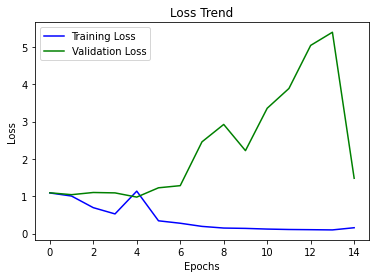

In [33]:
#plot the loss curve training and validation data against epochs
loss = history_BOW.history['loss']
val_loss = history_BOW.history['val_loss']
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Trend')
plt.plot(loss, 'blue', label='Training Loss')
plt.plot(val_loss, 'green', label='Validation Loss')
plt.xticks(range(0,15)[0::2])
plt.legend()
plt.show()

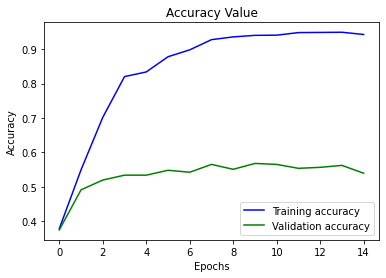

In [34]:
#plot the Accuracy curve training and validation data against epochs
acc = history_BOW.history['acc']
val_acc = history_BOW.history['val_acc']
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Value')
plt.plot(acc, 'blue', label='Training accuracy')
plt.plot(val_acc, 'green', label='Validation accuracy')
plt.xticks(range(0,15)[0::2])
plt.legend()
plt.show()

In [351]:
## -- save and load keras model
def save_keras_model(model, model_name, path='SentimentModels'):
    data_path = os.path.join(path, model_name)
    if not os.path.exists(data_path):
        os.makedirs(data_path)
    model.save_weights(os.path.join(data_path, model_name+'_weights.hdf5'))
    with open(os.path.join(data_path, model_name+'_architecture.json'), 'w') as f:
        f.write(model.to_json())  
        
def load_keras_model(model_name, path='SentimentModels'):
    data_path = os.path.join(path, model_name)
    with open(os.path.join(data_path, model_name+'_architecture.json'), 'r') as f:
        model = model_from_json(f.read())
    model.load_weights(os.path.join(data_path, model_name+'_weights.hdf5'))
    return model

In [37]:
#Save our Model
save_keras_model(model=model_BOW,model_name='SentimentBOW_LSTM', path='SentimentModels')
print("your Model is saved")

your Model is saved


In [38]:
#Validate our model and load best val_accuracy

BOW_LSTM_model=load_keras_model(model_name='SentimentBOW_LSTM')

BOW_LSTM_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

BOW_LSTM_model.evaluate(X_test,y_test)


352/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.4811903346668591, 0.53977275]

In [21]:
def plot_cm(y_true, y_pred, labels=None, figsize=None):
    if not labels:
        labels = np.unique(y_true)
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

352/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Score: 1.4812
Accuracy: 0.5398
[[60 37 22]
 [30 90 12]
 [31 30 40]]
              precision    recall  f1-score   support

           0       0.50      0.50      0.50       119
           1       0.57      0.68      0.62       132
           2       0.54      0.40      0.46       101

    accuracy                           0.54       352
   macro avg       0.54      0.53      0.53       352
weighted avg       0.54      0.54      0.53       352

0.5397727272727273


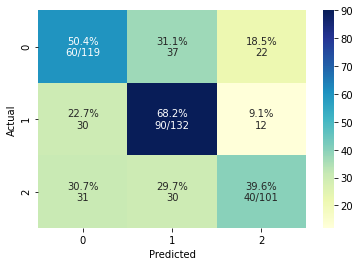

In [40]:
# Evaluate model
score, acc = BOW_LSTM_model.evaluate(X_test,y_test)
    
print('Score: %1.4f' % score)
print('Accuracy: %1.4f' % acc)

predictions = BOW_LSTM_model.predict(X_test)

print(confusion_matrix(y_test.argmax(axis=1),predictions.argmax(axis=1)))  
print(classification_report(y_test.argmax(axis=1),predictions.argmax(axis=1)))  
print(accuracy_score(y_test.argmax(axis=1), predictions.argmax(axis=1)))
plot_cm( y_test.argmax(axis=1),  predictions.argmax(axis=1))

**Try to predict label for random sentence**

In [359]:
#neg=[1., 0., 0.] or 0  #our lapel
#pos=[0., 1., 0.] or 1
#neu=[0., 0., 1.] or 2
def remove_Stopwords(sentence):
    temp_list=[]
    for word in sentence.split():
        if word not in stop:
            temp_list.append(word)
    sentence=' '.join(temp_list)
    return sentence
    
def remove_stopWord_clean(sentence):
    sentence=str(sentence)
    sentence=clean_text(sentence)
    sentence=remove_Stopwords(sentence)
    return sentence

def Predict_By_BOW_LSTM_model(sentence):
    sentence=remove_stopWord_clean(sentence)
    test_seq=pad_sequences(tok.texts_to_sequences([sentence]),maxlen=30)
    proba=BOW_LSTM_model.predict_proba(test_seq)
    proba1=proba.argmax(axis=1)[0]
    if proba1==0:
        return 'neg',proba
    elif proba1==1:
        return 'pos',proba
    else:
        return 'neu',proba
def predict_ML_TFIDF(sentence,bestModel):
    sentence=remove_stopWord_clean(sentence)
    sentence_TF=TFIDF([sentence])
    proba=bestModel.predict_proba(sentence_TF)
    proba1=proba.argmax(axis=1)[0]
    if proba1==0:
        return 'neg',proba
    elif proba1==1:
        return 'pos',proba
    else:
        return 'neu',proba

    

In [42]:
CY_trainTest.iloc[12]

tweet    ' """@horyagana ان شاء الله ، النصر من عند الله والظلم مهما طاااااااااااال لابد من حلول العدل وأنتصار العدل والحق في النهاية هي دي قاعده المسلم"""" '
class                                                                                                                                                      pos
Name: 12, dtype: object

In [43]:
Predict_By_BOW_LSTM_model(CY_trainTest.tweet.iloc[12])


('pos', array([[0.00347318, 0.98587286, 0.01065389]], dtype=float32))

**2. Try Machine learning model with TF-IDF**


In [44]:
vectorizer = TfidfVectorizer(stop_words=stop,max_features=1000,analyzer=lambda x:[w for w in x if w not in stop],ngram_range=(1,2))
vectorizer.fit(X)


C:\Users\Mohammed\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:498: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn("The parameter 'ngram_range' will not be used"
C:\Users\Mohammed\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:502: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'stop_words' will not be used"


TfidfVectorizer(analyzer=<function <lambda> at 0x0000025F42908C80>,
                max_features=1000, ngram_range=(1, 2),
                stop_words=['يكون', 'وليس', 'وكان', 'كذلك', 'التي', 'وبين',
                            'عليها', 'مساء', 'الذي', 'وكانت', 'ولكن', 'والتي',
                            'تكون', 'اليوم', 'اللذين', 'عليه', 'كانت', 'لذلك',
                            'أمام', 'هناك', 'منها', 'مازال', 'لازال', 'لايزال',
                            'مايزال', 'اصبح', 'أصبح', 'أمسى', 'امسى', 'أضحى', ...])

In [45]:
tfidf_matrix_train = vectorizer.transform(X)

In [46]:
tfidf_matrix_train[0]

<1x23 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [47]:
#trainingTFIDF = np.concatenate(trainingTFIDF)
X_trainTF,X_testTF,y_trainTF,y_testTF=train_test_split(tfidf_matrix_train,y,train_size=0.85,test_size=0.15,random_state=43)


In [48]:
def TFIDF(s):  #for test sentence
    tfidf_matrix_test = vectorizer.transform(s).toarray()
    #tfidf_matrix_test=np.concatenate(np.array(tfidf_matrix_test.todense()))
    return tfidf_matrix_test

import machine learning algorithms

In [49]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [50]:
#Here we will try more than one model with hyper prameter tuning and select the best one interms of its accuracy
logi_clf = LogisticRegression(solver='lbfgs', max_iter=500)
logi_parm = {"C": [0.1, 0.5, 1, 5, 10, 50],
            'random_state': [0,1,2,3,4,5]}

svm_clf = SVC(probability=True)
svm_parm = {'kernel': ['rbf', 'poly'], 
            'C': [1, 5, 50, 100, 500, 1000,1500,2000], 
            'degree': [3, 5, 7], 
       'gamma':[0.01,0.04,.1,0.2,.3,.4,.6],
           'random_state': [0,1,2,3,4,5]}

dt_clf = DecisionTreeClassifier()
dt_parm = {'criterion':['gini', 'entropy'],
          'random_state': [0,1,2,3,4,5]}

knn_clf = KNeighborsClassifier()
knn_parm = {'n_neighbors':[5, 10, 15, 20], 
            'weights':['uniform', 'distance'], 
            'p': [1,2]}


clfs = [logi_clf, svm_clf, dt_clf, knn_clf]
params = [logi_parm, svm_parm, dt_parm, knn_parm] 
clf_names = ['logistic', 'SVM', 'DT', 'KNN']


In [51]:
clfs_opt = []
clfs_best_scores = []
clfs_best_param = []
for clf_, param in tqdm(zip(clfs, params)):
    clf = RandomizedSearchCV(clf_, param, cv=5)
    clf.fit(X_trainTF,y_trainTF)
    clfs_opt.append(clf.best_estimator_)
    clfs_best_scores.append(clf.best_score_)
    clfs_best_param.append(clf.best_params_)

4it [02:29, 37.34s/it]


In [52]:
max(clfs_best_scores)
#print the best accuracy

0.43581818868779987

In [53]:

#print best prameters for best score
arg = np.argmax(clfs_best_scores)
clfs_best_param[arg]

{'random_state': 4, 'C': 0.5}

In [54]:
#print all scores for 'logistic', 'SVM', 'DT', 'KNN' respectively
clfs_best_scores

[0.43581818868779987,
 0.4327968161610055,
 0.3831526051309177,
 0.43230311960806544]

In [55]:
#print best prameters for each estimators
clfs_opt

[LogisticRegression(C=0.5, max_iter=500, random_state=4),
 SVC(C=1, degree=7, gamma=0.4, probability=True, random_state=0),
 DecisionTreeClassifier(random_state=5),
 KNeighborsClassifier(n_neighbors=15, p=1, weights='distance')]

In [57]:
CY_trainTest.iloc[71]

tweet    ' @i3abmo3ty كنت نايم معلش '
class                             neu
Name: 71, dtype: object

In [59]:
#Truy to predict reandom sentence by #bestMLModel
best_clf=LogisticRegression(random_state= 4,  C= 0.5)
best_clf.fit(X_trainTF,y_trainTF)

predict_ML_TFIDF(sentence=CY_trainTest.tweet.iloc[70],bestModel=best_clf)

('pos', array([[0.30373567, 0.49690502, 0.19935931]]))

[[64 44  6]
 [41 86  7]
 [42 50 12]]
              precision    recall  f1-score   support

           0       0.44      0.56      0.49       114
           1       0.48      0.64      0.55       134
           2       0.48      0.12      0.19       104

    accuracy                           0.46       352
   macro avg       0.46      0.44      0.41       352
weighted avg       0.46      0.46      0.42       352

0.4602272727272727


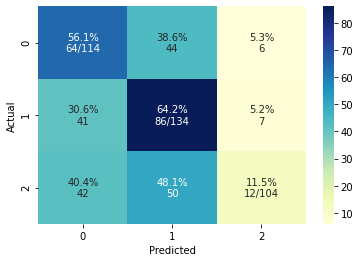

In [60]:
# Evaluate model

predictions = best_clf.predict(X_testTF)

print(confusion_matrix(y_testTF,predictions))  
print(classification_report(y_testTF,predictions))  
print(accuracy_score(y_testTF, predictions))
plot_cm( y_testTF,  predictions)

**3. TF-IDF with ANN**

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

tvec1 = TfidfVectorizer(max_features=4000,ngram_range=(1, 3))
tvec1.fit(x_train)

TfidfVectorizer(max_features=4000, ngram_range=(1, 3))

In [49]:
#joblib.dump(tvec1, 'SentimentModels/TFIDF/TFIDF_ForANN.pkl')
y[:3]

0    0
1    1
2    1
Name: class_num, dtype: int64

In [50]:
x_train_tfidf = tvec1.transform(x_train)

In [51]:
x_test_tfidf=tvec1.transform(x_test)

In [52]:
vectorizer = joblib.load('SentimentModels/TFIDF/TFIDF_ForANN.pkl')
x_test_tfidf1=vectorizer.transform(x_test)

In [53]:
x_test_tfidf[0]

<1x4000 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [54]:
y_train[:5]

1834    2
564     0
297     0
931     1
239     1
Name: class_num, dtype: int64

In [55]:
y_label_categ = to_categorical(y_train)
y_test_categ=to_categorical(y_test)


In [56]:
np.shape(x_test_tfidf,),np.shape(y_test_categ)

((470, 4000), (470, 3))

In [57]:
x_train_tfidf[:1].shape

(1, 4000)

In [58]:
%%time
earlystop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2, restore_best_weights=True)

custom_adam = Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

model_ANN = Sequential()
model_ANN.add(Dense(64, activation='relu', input_dim=4000))
model_ANN.add(Dropout(0.45))

model_ANN.add(Dense(3, activation='softmax'))
model_ANN.compile(loss='categorical_crossentropy',optimizer=custom_adam,
              metrics=['accuracy'])
hist_adam =model_ANN.fit(x=x_train_tfidf, y=y_label_categ,batch_size= 32,
                    epochs=40,validation_split=0.2,shuffle=True,verbose = 1,callbacks=[earlystop])



Train on 1500 samples, validate on 376 samples
Epoch 1/40
1500/1500 [==============================] - 0s 242us/sample - loss: 1.0780 - accuracy: 0.4153 - val_loss: 1.0232 - val_accuracy: 0.5293
Epoch 2/40
1500/1500 [==============================] - 0s 117us/sample - loss: 0.8375 - accuracy: 0.7073 - val_loss: 0.9088 - val_accuracy: 0.5957
Epoch 3/40
1500/1500 [==============================] - 0s 110us/sample - loss: 0.4799 - accuracy: 0.8433 - val_loss: 0.9571 - val_accuracy: 0.5505
Epoch 4/40
1500/1500 [==============================] - 0s 112us/sample - loss: 0.2839 - accuracy: 0.9087 - val_loss: 1.0651 - val_accuracy: 0.5346
Epoch 5/40
1500/1500 [==============================] - 0s 100us/sample - loss: 0.2088 - accuracy: 0.9227 - val_loss: 1.1467 - val_accuracy: 0.5426
Epoch 6/40
1500/1500 [==============================] - 0s 104us/sample - loss: 0.1523 - accuracy: 0.9400 - val_loss: 1.2467 - val_accuracy: 0.5505
Epoch 7/40
1500/1500 [==============================] - 0s 103us/

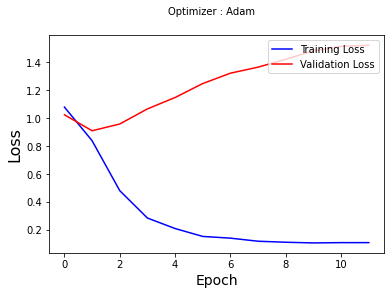

In [59]:
#plotting Loss
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.plot(hist_adam.history['loss'], color='b', label='Training Loss')
plt.plot(hist_adam.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

In [60]:
hist_adam.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

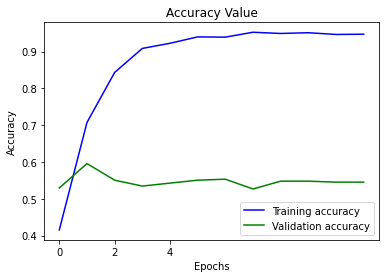

In [61]:
#plot the Accuracy curve training and validation data against epochs
acc = hist_adam.history['accuracy']
val_acc = hist_adam.history['val_accuracy']
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Value')
plt.plot(acc, 'blue', label='Training accuracy')
plt.plot(val_acc, 'green', label='Validation accuracy')
plt.xticks(range(0,5)[0::2])
plt.legend()
plt.show()

470/470 [==============================] - 0s 68us/sample - loss: 0.9139 - accuracy: 0.5447
Score: 0.9139
Accuracy: 0.5447
[[135  34  25]
 [ 60  99  21]
 [ 49  25  22]]
              precision    recall  f1-score   support

           0       0.55      0.70      0.62       194
           1       0.63      0.55      0.59       180
           2       0.32      0.23      0.27        96

    accuracy                           0.54       470
   macro avg       0.50      0.49      0.49       470
weighted avg       0.53      0.54      0.53       470

0.5446808510638298


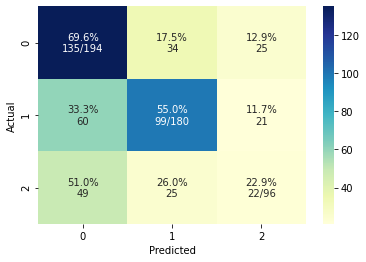

In [62]:
# Evaluate model
score, acc = model_ANN.evaluate(x_test_tfidf,y_test_categ)

print('Score: %1.4f' % score)
print('Accuracy: %1.4f' % acc)

predictions = model_ANN.predict(x_test_tfidf)

print(confusion_matrix(y_test_categ.argmax(axis=1),predictions.argmax(axis=1)))  
print(classification_report(y_test_categ.argmax(axis=1),predictions.argmax(axis=1)))  
print(accuracy_score(y_test_categ.argmax(axis=1), predictions.argmax(axis=1)))
plot_cm( y_test_categ.argmax(axis=1),  predictions.argmax(axis=1))

In [63]:
#Save our Model
save_keras_model(model=model_ANN,model_name='Sentimentmodel_ANN', path='SentimentModels')
print("your Model is saved")

your Model is saved


In [64]:
model_ANN_TFIDF=load_keras_model(model_name='Sentimentmodel_ANN')

In [65]:
def Predict_By_model_ANN_TFIDF(sentence):
    sentence=str(sentence)
    sentence=remove_stopWord_clean(sentence)
    TFIDF_vector=tvec1.transform([sentence])
    proba=model_ANN_TFIDF.predict_proba(TFIDF_vector)
    proba1=proba.argmax(axis=1)[0]
    if proba1==0:
        return 'neg',proba
    elif proba1==1:
        return 'pos',proba
    else:
        return 'neu',proba

In [66]:
#test one record
CY_trainTest.iloc[12]

tweet    ' """@horyagana ان شاء الله ، النصر من عند الله والظلم مهما طاااااااااااال لابد من حلول العدل وأنتصار العدل والحق في النهاية هي دي قاعده المسلم"""" '
class                                                                                                                                                      pos
Name: 12, dtype: object

In [67]:
Predict_By_model_ANN_TFIDF(CY_trainTest.iloc[12].tweet)

('pos', array([[0.09290925, 0.7417115 , 0.16537921]], dtype=float32))

**4. W2Vec with LSTM**

In [22]:
CY_trainW2V=CY_train.copy()

In [23]:

CY_trainW2V.rename(columns = {'class':'Categ'}, inplace = True)
CY_trainW2V.head()

,tweet,Categ,class_num
0,فينو الاهبل ابن الاهبل,neg,0
1,المصرين وجمالهم ربنا يحميهم,pos,1
2,دول اوي ودمهم خفيف العمارة كلها سورين والاطفال عسل,pos,1
3,خلي يوعني بحاجه همضي وصل امانه اضمن انو يخون,neg,0
4,هنتحر,neg,0


In [24]:
# #label class to num
# Y=CY_trainW2V.Categ
# title_mapping = {"neg": 0, "pos": 1, "neu": 2}
# Y['Categ'] = Y['Categ'].map(title_mapping)
# y1=pd.DataFrame(Y)
# #y_label_categ = to_categorical(Y)


In [25]:
#y_label_categ[:5]

In [26]:
#np.argmax(y_label_categ[2])

In [27]:
# Create the list of list format of the custom corpus for gensim modeling
sent = [row.split(',') for row in CY_trainW2V['tweet']]
sent = [row[0].split(' ') for row in sent]
#Genism word2vec Model Training
model_W2vec_CY =Word2Vec(sent,seed=42, min_count=2,size= 300,workers=3, window =3)
model_W2vec_CY.wv.save_word2vec_format('SentimentModels/W2Vec/model_W2vec_CY.bin', binary=True)
model_W2vec_CY =KeyedVectors.load_word2vec_format('SentimentModels/W2Vec/model_W2vec_CY.bin', binary=True)
word2vec_Old = KeyedVectors.load_word2vec_format('SentimentModels/W2Vec/w2v_model.bin', binary=True)


In [28]:
model_W2vec_CY.most_similar('جميل')

[('اشهر', 0.211833193898201),
 ('بجد', 0.20498433709144592),
 ('صل', 0.1950821429491043),
 ('بعيد', 0.1832733154296875),
 ('سيدنا', 0.17711493372917175),
 ('وكله', 0.17072616517543793),
 ('حضور', 0.16911527514457703),
 ('تجنني', 0.16703490912914276),
 ('البطئ', 0.16523496806621552),
 ('جاريدو', 0.15997886657714844)]

In [29]:
word2vec_Old.most_similar('جميل')

[('رائع', 0.7987561225891113),
 ('جيد', 0.6975123882293701),
 ('ممتاز', 0.6722943186759949),
 ('جميل_جدا', 0.6625348925590515),
 ('ممتع', 0.6246637105941772),
 ('حلو', 0.6158772706985474),
 ('اعجبني', 0.5748803615570068),
 ('جيد_جدا', 0.5681601762771606),
 ('نطيف', 0.5677462816238403),
 ('مميز', 0.5666744709014893)]

**4 --1. model_W2vec_CY based on CY Data**

In [30]:
num_features = model_W2vec_CY.vector_size
num_features

300

In [375]:
## -- Word2Vec vectorizer class for classification
        
class WordVecVectorizer(object):
    def __init__(self, word2vec, max_len=30):
        self.word2vec = word2vec
        self.dim = word2vec.vector_size
        self.max_len = max_len

    def fit(self, X, y):
        return self    

    def transform(self, X):
        """
        Transforms a document to one vector of a size = word2vec.vector_size (dim), 
        by taking the mean of th vectors of every word.
        The output size will be of shape (X.shape[0], self.dim).
        """
        return np.array([
            np.mean([self.word2vec[w] for w in texts if w in self.word2vec]
                    or [1e-12 * np.random.normal(scale=0.6, size=self.dim)], axis=0)
            for texts in X
        ])
        
    def instance_transform(self, X):
        """
        Transforms a document to a 3D array based on the word2vec vector transformation of every instance (word),
        while the words that exceeds the maximum allowable length (max_len) will be removed.
        If the sentance is less than max_len, it will be padded with zeros.
        The output size will be of shape (X.shape[0], self.max_len, self.dim).
        """
        return np.array([
            [self.word2vec[w] if w in self.word2vec else 1e-12 * np.random.normal(scale=0.0, size=self.dim) for i, w in enumerate(texts.split()) if i<self.max_len] + [1e-12 * np.random.normal(scale=0.0, size=self.dim)]*(self.max_len-min(self.max_len, len(texts.split())))
            for texts in X
        ])


In [376]:
vec = WordVecVectorizer(model_W2vec_CY)
# X = vec.fit_transform(CY_trainW2V.tweet)

X_train, X_val, y_train, y_val = train_test_split(vec.instance_transform(CY_trainW2V.tweet), CY_trainW2V.class_num, test_size=0.2, random_state=42)

In [587]:
vec.instance_transform(['وكما أننا نسعد أن نري كل العالم بخير وسلام وآمان']).shape

(1, 30, 300)

In [377]:
len(y_train),len(X_train)

(1876, 1876)

In [378]:
X_train.shape

(1876, 30, 300)

In [379]:
X_train[32].shape

(30, 300)

In [328]:
y_train.shape

(1876,)

In [329]:
if not isinstance(X_train, np.ndarray):
    X_train = X_train.toarray()
    X_val = X_val.toarray()
labelencoder = LabelEncoder()
l = list(set(y_train))
l.sort()
y_train = to_categorical(labelencoder.fit_transform(y_train))
y_val = to_categorical(labelencoder.transform(y_val))
int_category = dict(zip(labelencoder.transform(l), l))
category_int = dict(zip(l, labelencoder.transform(l)))

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(1876, 30, 300)
(1876, 3)
(470, 30, 300)
(470, 3)


In [330]:
y_train[:5]

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [331]:
#y_train1[:5]

In [332]:
def modelBuild(input_shape, dense_out):
    sentence_indices = Input(input_shape, name="input")
    X = sentence_indices
    X = Bidirectional(LSTM(300, dropout=0.3, return_sequences=True, name="lstm_1",implementation = 2, recurrent_activation = 'sigmoid'),name="bidirectional")(X)
    #X = GlobalMaxPool1D(name="global_max_pooling1d")(X)
    #X =MaxPool1D(pool_size=5, strides=2)(X)
    #X=GlobalAveragePooling1D(X)
    X = GlobalMaxPool1D(name="global_max_pooling1d")(X)
    #X = SimpleRNN(layers[0], dropout=0.55)(X)
    #X=(layers.Conv1D(num_filters, 5, activation='relu'))(X)
    #X=(layers.GlobalMaxPooling1D())(X)
    X = Dense(256, activation='relu')(X)
    X = Dropout(0.3)(X)
    X =(layers.Dense(10, activation='relu'))(X)

    X = Dense(dense_out, activation='softmax')(X) # Number of classes
    # Create Model instance which converts sentence_indices into X.
    model = Model(inputs=sentence_indices, outputs=X)
    return model

In [333]:
custom_adam = Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
dense_out =3

input_shape = X_train.shape[1:]

modelCY = modelBuild(input_shape, dense_out)

print(modelCY.summary())


modelCY.compile(loss='categorical_crossentropy', optimizer=custom_adam, metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 30, 300)]         0         
_________________________________________________________________
bidirectional (Bidirectional (None, 30, 600)           1442400   
_________________________________________________________________
global_max_pooling1d (Global (None, 600)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               153856    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 33  

In [334]:
earlystop = EarlyStopping(monitor='val_loss', patience=10, verbose=2, restore_best_weights=True)
history = modelCY.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=30,
                    validation_data=(X_val, y_val),
                    verbose = 1,
                    callbacks=[earlystop])

Train on 1876 samples, validate on 470 samples
Epoch 1/20
1876/1876 [==============================] - 47s 25ms/sample - loss: 1.0944 - accuracy: 0.3678 - val_loss: 1.0756 - val_accuracy: 0.3830
Epoch 2/20
1876/1876 [==============================] - 48s 25ms/sample - loss: 1.0974 - accuracy: 0.3822 - val_loss: 1.0772 - val_accuracy: 0.3830
Epoch 3/20
1876/1876 [==============================] - 45s 24ms/sample - loss: 1.0898 - accuracy: 0.3822 - val_loss: 1.0761 - val_accuracy: 0.3830
Epoch 4/20
1876/1876 [==============================] - 47s 25ms/sample - loss: 1.0893 - accuracy: 0.3811 - val_loss: 1.0715 - val_accuracy: 0.3830
Epoch 5/20
1876/1876 [==============================] - 49s 26ms/sample - loss: 1.0899 - accuracy: 0.3769 - val_loss: 1.0806 - val_accuracy: 0.3830
Epoch 6/20
1876/1876 [==============================] - 43s 23ms/sample - loss: 1.0890 - accuracy: 0.3817 - val_loss: 1.0683 - val_accuracy: 0.3830
Epoch 7/20
1876/1876 [==============================] - 46s 25ms/

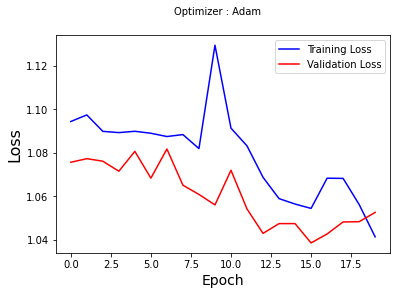

In [335]:
#plotting Loss
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

In [336]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

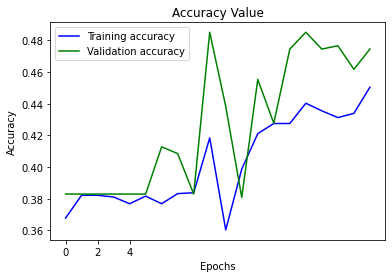

In [337]:
#plot the Accuracy curve training and validation data against epochs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Value')
plt.plot(acc, 'blue', label='Training accuracy')
plt.plot(val_acc, 'green', label='Validation accuracy')
plt.xticks(range(0,5)[0::2])
plt.legend()
plt.show()

470/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Score: 1.0525
Accuracy: 0.4745
[[183  11   0]
 [140  40   0]
 [ 92   4   0]]
              precision    recall  f1-score   support

           0       0.44      0.94      0.60       194
           1       0.73      0.22      0.34       180
           2       0.00      0.00      0.00        96

    accuracy                           0.47       470
   macro avg       0.39      0.39      0.31       470
weighted avg       0.46      0.47      0.38       470

0.474468085106383


C:\Users\Mohammed\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mohammed\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mohammed\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

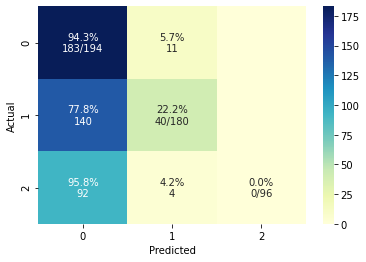

In [338]:
# Evaluate model
score, acc = modelCY.evaluate(X_val, y_val)

print('Score: %1.4f' % score)
print('Accuracy: %1.4f' % acc)

predictions = modelCY.predict(X_val)

print(confusion_matrix(y_val.argmax(axis=1),predictions.argmax(axis=1)))  
print(classification_report(y_val.argmax(axis=1),predictions.argmax(axis=1)))  
print(accuracy_score(y_val.argmax(axis=1), predictions.argmax(axis=1)))
plot_cm( y_val.argmax(axis=1),  predictions.argmax(axis=1))

**4--2 Using pre-trained Word Vectors**

In [339]:
vec_Old= WordVecVectorizer(word2vec_Old)
# X = vec.fit_transform(CY_trainW2V.tweet)

X_train_Old, X_val_Old, y_train_Old, y_val_Old = train_test_split(vec_Old.instance_transform(CY_trainW2V.tweet), CY_trainW2V.class_num, test_size=0.2, random_state=42)

In [387]:
vec_Old.instance_transform(['KGMMH bfdb']).shape

(1, 30, 300)

In [340]:
if not isinstance(X_train_Old, np.ndarray):
    X_train_Old = X_train_Old.toarray()
    X_val_Old = X_val_Old.toarray()
labelencoder = LabelEncoder()
l = list(set(y_train_Old))
l.sort()
y_train_Old = to_categorical(labelencoder.fit_transform(y_train_Old))
y_val_Old = to_categorical(labelencoder.transform(y_val_Old))
int_category = dict(zip(labelencoder.transform(l), l))
category_int = dict(zip(l, labelencoder.transform(l)))

print(X_train_Old.shape)
print(y_train_Old.shape)
print(X_val_Old.shape)
print(y_val_Old.shape)

(1876, 30, 300)
(1876, 3)
(470, 30, 300)
(470, 3)


In [341]:
X_train_Old[0].shape

(30, 300)

In [342]:
opt = Adam(lr=1e-4, decay=1e-3 / 200)
dense_out =3

input_shape = X_train_Old.shape[1:]

model_Old = modelBuild(input_shape, dense_out)

print(model_Old.summary())



model_Old.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 30, 300)]         0         
_________________________________________________________________
bidirectional (Bidirectional (None, 30, 600)           1442400   
_________________________________________________________________
global_max_pooling1d (Global (None, 600)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               153856    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2570      
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 33  

In [343]:
#d_class_weights2={0: 0.8, 1: 1, 2: 0.75}

In [344]:
earlystop = EarlyStopping(monitor='val_loss', patience=10, verbose=2, restore_best_weights=True)
history_old = model_Old.fit(X_train_Old,
                    y_train_Old,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_val_Old, y_val_Old),
                    verbose = 1,
                    callbacks=[earlystop])

Train on 1876 samples, validate on 470 samples
Epoch 1/20
1876/1876 [==============================] - 45s 24ms/sample - loss: 1.0955 - accuracy: 0.3731 - val_loss: 1.0872 - val_accuracy: 0.4149
Epoch 2/20
1876/1876 [==============================] - 42s 23ms/sample - loss: 1.0848 - accuracy: 0.4387 - val_loss: 1.0762 - val_accuracy: 0.3830
Epoch 3/20
1876/1876 [==============================] - 46s 25ms/sample - loss: 1.0577 - accuracy: 0.4590 - val_loss: 0.9722 - val_accuracy: 0.5723
Epoch 4/20
1876/1876 [==============================] - 47s 25ms/sample - loss: 0.9798 - accuracy: 0.5341 - val_loss: 0.9483 - val_accuracy: 0.5702
Epoch 5/20
1876/1876 [==============================] - 44s 23ms/sample - loss: 0.9316 - accuracy: 0.5661 - val_loss: 0.9195 - val_accuracy: 0.5872
Epoch 6/20
1876/1876 [==============================] - 47s 25ms/sample - loss: 0.9054 - accuracy: 0.5746 - val_loss: 0.9104 - val_accuracy: 0.5851
Epoch 7/20
1876/1876 [==============================] - 45s 24ms/

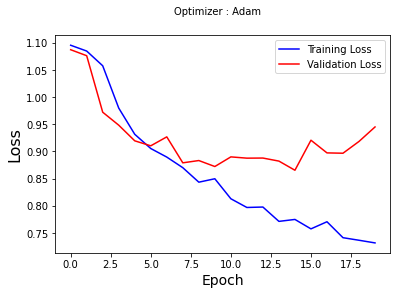

In [346]:
#plotting Loss
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.plot(history_old.history['loss'], color='b', label='Training Loss')
plt.plot(history_old.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

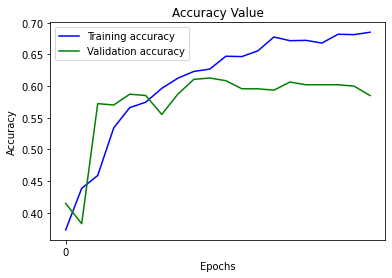

In [347]:
#plot the Accuracy curve training and validation data against epochs
acc = history_old.history['accuracy']
val_acc = history_old.history['val_accuracy']
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Value')
plt.plot(acc, 'blue', label='Training accuracy')
plt.plot(val_acc, 'green', label='Validation accuracy')
plt.xticks(range(0,5)[0::20])
plt.legend()
plt.show()

In [355]:
# # Evaluate model
# score, acc = model_Old.evaluate(X_val_Old, y_val_Old)

# print('Score: %1.4f' % score)
# print('Accuracy: %1.4f' % acc)

# predictions = model_Old.predict(X_val_Old)

# print(confusion_matrix(y_val.argmax(axis=1),predictions.argmax(axis=1)))  
# print(classification_report(y_val.argmax(axis=1),predictions.argmax(axis=1)))  
# print(accuracy_score(y_val.argmax(axis=1), predictions.argmax(axis=1)))
# plot_cm( y_val.argmax(axis=1),  predictions.argmax(axis=1))

In [352]:
#Save our Model
save_keras_model(model=model_Old,model_name='OldW2vec_LSTM', path='SentimentModels')
print("your Model is saved")

your Model is saved


In [441]:
#load saved model 
model_OldW2vec_LSTM=load_keras_model(model_name='OldW2vec_LSTM')
model_OldW2vec_LSTM.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

470/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Score: 0.9451
Accuracy: 0.5851
[[115  61  18]
 [ 35 134  11]
 [ 36  34  26]]
              precision    recall  f1-score   support

           0       0.62      0.59      0.61       194
           1       0.59      0.74      0.66       180
           2       0.47      0.27      0.34        96

    accuracy                           0.59       470
   macro avg       0.56      0.54      0.53       470
weighted avg       0.58      0.59      0.57       470

0.5851063829787234


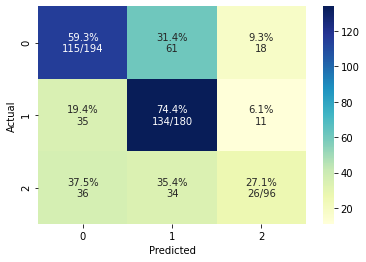

In [442]:
# Evaluate model

X_val_Old = np.array(X_val_Old)
y_val_Old = np.array(y_val_Old)
score, acc = model_OldW2vec_LSTM.evaluate(X_val_Old, y_val_Old)

print('Score: %1.4f' % score)
print('Accuracy: %1.4f' % acc)

predictions = model_OldW2vec_LSTM.predict(X_val_Old)

print(confusion_matrix(y_val_Old.argmax(axis=1),predictions.argmax(axis=1)))  
print(classification_report(y_val_Old.argmax(axis=1),predictions.argmax(axis=1)))  
print(accuracy_score(y_val_Old.argmax(axis=1), predictions.argmax(axis=1)))
plot_cm( y_val_Old.argmax(axis=1),  predictions.argmax(axis=1))

In [415]:
def Predict_By_model_OldW2vec_LSTM(sentence):
    sentence=str(sentence)
    sentence=remove_stopWord_clean(sentence)
    W2Vec_vector_old=vec_Old.instance_transform([sentence])
    proba=model_OldW2vec_LSTM.predict(W2Vec_vector_old)[0]
    proba1=proba.argmax(axis=0)
    if proba1==0:
        return 'neg',proba
    elif proba1==1:
        return 'pos'
    else:
        return 'neu',proba
    return proba

In [416]:
#Try to predict single record
CY_trainTest.iloc[11]

tweet    ' @1987Assy  3 وكما أننا نسعد أن نري كل العالم بخير وسلام وآمان '
class                                                                  pos
Name: 11, dtype: object

In [418]:
Predict_By_model_OldW2vec_LSTM(CY_trainTest.tweet.iloc[11])


'pos'

**4 --3 Initialize a new word2vec model with pre-trained model weights and tune class weigh as well**

ref: https://datascience.stackexchange.com/questions/10695/how-to-initialize-a-new-word2vec-model-with-pre-trained-model-weights

ref:  https://gist.github.com/AbhishekAshokDubey/054af6f92d67d5ef8300fac58f59fcc9

In [419]:
CY_trainW2V.Categ.value_counts()

pos    896
neg    844
neu    606
Name: Categ, dtype: int64

In [422]:
print(len(word2vec_Old.wv.vocab))  #the number of learnred words
word2vec_Old.most_similar('جميل')

116907


C:\Users\Mohammed\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('رائع', 0.7987561225891113),
 ('جيد', 0.6975123882293701),
 ('ممتاز', 0.6722943186759949),
 ('جميل_جدا', 0.6625348925590515),
 ('ممتع', 0.6246637105941772),
 ('حلو', 0.6158772706985474),
 ('اعجبني', 0.5748803615570068),
 ('جيد_جدا', 0.5681601762771606),
 ('نطيف', 0.5677462816238403),
 ('مميز', 0.5666744709014893)]

In [423]:
print(len(model_W2vec_CY.wv.vocab)) #before update the weights
model_W2vec_CY.most_similar('جميل') 

2419


C:\Users\Mohammed\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('اشهر', 0.211833193898201),
 ('بجد', 0.20498433709144592),
 ('صل', 0.1950821429491043),
 ('بعيد', 0.1832733154296875),
 ('سيدنا', 0.17711493372917175),
 ('وكله', 0.17072616517543793),
 ('حضور', 0.16911527514457703),
 ('تجنني', 0.16703490912914276),
 ('البطئ', 0.16523496806621552),
 ('جاريدو', 0.15997886657714844)]

In [425]:
model_CY = Word2Vec(size=300, min_count=2,iter=5)
model_CY.build_vocab(sent)
training_examples_count = model_CY.corpus_count
# below line will make it 1, so saving it before
model_CY.build_vocab([list(word2vec_Old.vocab.keys())], update=True)
model_CY.intersect_word2vec_format("SentimentModels/W2Vec/w2v_model.bin",binary=True, lockf=1.0)
model_CY.train(sent,total_examples=training_examples_count, epochs=model_CY.iter)
model_CY.wv.save_word2vec_format("SentimentModels/W2Vec/model_W2vec_CY_V2.bin", binary=True) #save updated weights W2vec Model
model_W2vec_CY_V2 =KeyedVectors.load_word2vec_format('SentimentModels/W2Vec/model_W2vec_CY_V2.bin', binary=True)

C:\Users\Mohammed\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  import sys


In [426]:
model_W2vec_CY_V2.most_similar('جميل') #  print simiarit words with its score after update the w2vec weights with 
#the same umber of words


[('رائع', 0.8646100163459778),
 ('ادعولي', 0.7631500959396362),
 ('رس', 0.7528311610221863),
 ('تصبحوا', 0.7519782781600952),
 ('بتقولوا', 0.751939058303833),
 ('شوفتي', 0.7514681220054626),
 ('حلو', 0.7514474987983704),
 ('مجلتكم', 0.7511909604072571),
 ('تالنت', 0.7511038780212402),
 ('عطلها', 0.7498560547828674)]

In [427]:
print(len(model_W2vec_CY_V2.wv.vocab))

2419


C:\Users\Mohammed\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [429]:
vec = WordVecVectorizer(model_W2vec_CY_V2)
# X = vec.fit_transform(CY_trainW2V.tweet)

X_train_V2, X_val_V2, y_train_V2, y_val_V2 = train_test_split(vec.instance_transform(CY_trainW2V.tweet), CY_trainW2V.class_num, test_size=0.2, random_state=42)

In [242]:
# y_train_V2_df=pd.DataFrame(y_train_V2)
# y_train_V2_df.Categ.value_counts()

In [431]:
if not isinstance(X_train_V2,np.ndarray):
    X_train_V2 = X_train_V2.toarray()
    X_val_V2 = X_val_V2.toarray()
labelencoder = LabelEncoder()
l = list(set(y_train_V2))
l.sort()
y_train_V2= to_categorical(labelencoder.fit_transform(y_train_V2))
y_val_V2 = to_categorical(labelencoder.transform(y_val_V2))
int_category = dict(zip(labelencoder.transform(l), l))
category_int = dict(zip(l, labelencoder.transform(l)))

print(X_train_V2.shape)
print(y_train_V2.shape)
print(X_val_V2.shape)
print(y_val_V2.shape)

(1876, 30, 300)
(1876, 3)
(470, 30, 300)
(470, 3)


In [433]:
opt = Adam(lr=1e-4, decay=1e-3 / 200)
dense_out =3

input_shape = X_train.shape[1:]

model_V2 = modelBuild(input_shape, dense_out)

print(model_V2.summary())


model_V2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 30, 300)]         0         
_________________________________________________________________
bidirectional (Bidirectional (None, 30, 600)           1442400   
_________________________________________________________________
global_max_pooling1d (Global (None, 600)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               153856    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                2570      
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 33  

In [434]:
#"pay more attention" to samples from an under-represented class.

y_integers = np.argmax(y_train_V2, axis=1)
class_weights = compute_class_weight('balanced', np.unique(y_integers), y_integers)
d_class_weights = dict(enumerate(class_weights))

C:\Users\Mohammed\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass classes=[0 1 2], y=[2 0 0 ... 1 0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [435]:
d_class_weights

{0: 0.9620512820512821, 1: 0.8733705772811918, 2: 1.2261437908496733}

In [436]:
d_class_weights2={0: 0.75, 1: 0.9, 2: 1}

In [438]:
earlystop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2, restore_best_weights=True)
history_V2 = model_V2.fit(X_train_V2,
                    y_train_V2,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_val_V2, y_val_V2),
                    shuffle=True,class_weight=d_class_weights2,
                    verbose = 1,
                    callbacks=[earlystop])

Train on 1876 samples, validate on 470 samples
Epoch 1/20
1876/1876 [==============================] - 46s 24ms/sample - loss: 0.9539 - accuracy: 0.3891 - val_loss: 0.9259 - val_accuracy: 0.3830
Epoch 2/20
1876/1876 [==============================] - 40s 21ms/sample - loss: 0.9432 - accuracy: 0.3817 - val_loss: 0.9179 - val_accuracy: 0.3830
Epoch 3/20
1876/1876 [==============================] - 47s 25ms/sample - loss: 0.9328 - accuracy: 0.3790 - val_loss: 0.9016 - val_accuracy: 0.3979
Epoch 4/20
1876/1876 [==============================] - 44s 24ms/sample - loss: 0.9181 - accuracy: 0.4158 - val_loss: 0.8922 - val_accuracy: 0.3957
Epoch 5/20
1876/1876 [==============================] - 44s 23ms/sample - loss: 0.9038 - accuracy: 0.4707 - val_loss: 0.8700 - val_accuracy: 0.4681
Epoch 6/20
1876/1876 [==============================] - 44s 23ms/sample - loss: 0.8800 - accuracy: 0.5235 - val_loss: 0.8226 - val_accuracy: 0.5489
Epoch 7/20
1876/1876 [==============================] - 46s 24ms/

In [443]:
#Save our Model
save_keras_model(model=model_V2,model_name='W2vecUpdated_LSTM', path='SentimentModels')
print("your Model is saved")

your Model is saved


In [445]:
#load saved model 
model_UpdatedW2vec_LSTM=load_keras_model(model_name='W2vecUpdated_LSTM')
model_UpdatedW2vec_LSTM.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [446]:
y_val_V2[0]

array([0., 1., 0.], dtype=float32)

470/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Score: 0.8760
Accuracy: 0.5745
[[118  31  45]
 [ 40 105  35]
 [ 29  20  47]]
              precision    recall  f1-score   support

           0       0.63      0.61      0.62       194
           1       0.67      0.58      0.63       180
           2       0.37      0.49      0.42        96

    accuracy                           0.57       470
   macro avg       0.56      0.56      0.56       470
weighted avg       0.59      0.57      0.58       470

0.574468085106383


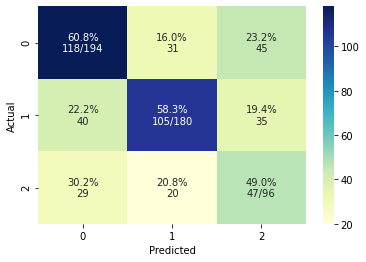

In [447]:
# Evaluate model

X_val_V2 = np.array(X_val_V2)
y_val_V2 = np.array(y_val_V2)
score, acc = model_UpdatedW2vec_LSTM.evaluate(X_val_V2, y_val_V2)

print('Score: %1.4f' % score)
print('Accuracy: %1.4f' % acc)

predictions = model_UpdatedW2vec_LSTM.predict(X_val_V2)

print(confusion_matrix(y_val_V2.argmax(axis=1),predictions.argmax(axis=1)))  
print(classification_report(y_val_V2.argmax(axis=1),predictions.argmax(axis=1)))  
print(accuracy_score(y_val_V2.argmax(axis=1), predictions.argmax(axis=1)))
plot_cm( y_val_V2.argmax(axis=1),  predictions.argmax(axis=1))

In [448]:
word2vec_Updated = KeyedVectors.load_word2vec_format('SentimentModels/W2Vec/model_W2vec_CY_V2.bin', binary=True)
vec_Updated = WordVecVectorizer(word2vec_Updated)
# X = vec.fit_transform(CY_trainW2V.tweet)

In [472]:
def Predict_By_model_W2vecUpdated_LSTM(sentence):
    sentence=str(sentence)
    sentence=remove_stopWord_clean(sentence)
    W2VecUpdate_vector=vec_Updated.instance_transform([sentence])
    proba=model_UpdatedW2vec_LSTM.predict(W2VecUpdate_vector)[0]
    proba1=np.argmax(proba)
    if proba1==0:
        return 'neg'
    elif proba1==1:
        return 'pos'
    else:
        return 'neu'

In [473]:
#Try to predict one record
#Try to predict single record
CY_trainTest.iloc[40]

tweet    ' @ba7r_ahmed ميرسي بجد !! '
class                             pos
Name: 40, dtype: object

In [474]:
Predict_By_model_W2vecUpdated_LSTM(CY_trainTest.tweet.iloc[40])

'pos'

**5. Concatenate W2Vec&Lstm and TFIDF&ANN**

In [475]:
# title_mapping = {"neg": 0, "pos": 1, "neu": 2}
# CY_trainW2V['Categ_num'] = CY_trainW2V['Categ'].map(title_mapping)

In [476]:
CY_trainW2V.head()

,tweet,Categ,class_num
0,فينو الاهبل ابن الاهبل,neg,0
1,المصرين وجمالهم ربنا يحميهم,pos,1
2,دول اوي ودمهم خفيف العمارة كلها سورين والاطفال عسل,pos,1
3,خلي يوعني بحاجه همضي وصل امانه اضمن انو يخون,neg,0
4,هنتحر,neg,0


**--->> First model TFIDF with ANN <<-----**

In [526]:
x_train_Tf, x_test_Tf, y_train_Tf, y_test_Tf = train_test_split(CY_trainW2V.tweet, CY_trainW2V.class_num, test_size=.2, random_state=42)

tvec2 = TfidfVectorizer(max_features=1000,ngram_range=(1, 3))
tvec2.fit(x_train_Tf)

TfidfVectorizer(max_features=1000, ngram_range=(1, 3))

In [527]:
x_train_Tf = tvec2.transform(x_train_Tf)
x_test_Tf = tvec2.transform(x_test_Tf)

In [528]:
y_label_categ_Tf = to_categorical(y_train_Tf)
y_test_categ_Tf=to_categorical(y_test_Tf)

In [529]:
x_train_Tf.shape,x_test_Tf.shape,y_label_categ_Tf.shape,y_test_categ_Tf.shape

((1876, 1000), (470, 1000), (1876, 3), (470, 3))

In [530]:
x_train_Tf.shape[1:]


(1000,)

In [537]:
x_train_Tf[0]

<1x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [535]:
y_test_categ_Tf[0]

array([0., 1., 0.], dtype=float32)

In [490]:
#build Ann Model for TF-IDF
input_shape=x_train_Tf.shape[1:][0]
modelANN = Sequential(name='ANN_For_TFIDF_Vector')
modelANN.add(Dense(64, activation='relu', input_dim=input_shape))
modelANN.add(Dropout(0.45))
modelANN.add(Dense(3, activation='softmax'))
modelANN.summary()

Model: "ANN_For_TFIDF_Vector"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 64)                64064     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 3)                 195       
Total params: 64,259
Trainable params: 64,259
Non-trainable params: 0
_________________________________________________________________


**---> Second build LSTM Model for updated weight W2Vec <---**

In [492]:
#load w2vec updated weight
word2vec_Updated = KeyedVectors.load_word2vec_format('SentimentModels/W2Vec/model_W2vec_CY_V2.bin', binary=True)
vec_Updated = WordVecVectorizer(word2vec_Updated)
# X = vec.fit_transform(CY_trainW2V.tweet)

X_train_V22, X_val_V22, y_train_V22, y_val_V22 = train_test_split(vec_Updated.instance_transform(CY_trainW2V.tweet), CY_trainW2V.class_num, test_size=0.2, random_state=42)

In [493]:
# y_train_V22 = to_categorical(y_train_V22)
# y_val_V22=to_categorical(y_val_V22)


# print(X_train_V22.shape)
# print(y_train_V22.shape)
# print(X_val_V22.shape)
# print(y_val_V22.shape)

In [494]:
if not isinstance(X_train_V22,np.ndarray):
    X_train_V22 = X_train_V22.toarray()
    X_val_V22 = X_val_V22.toarray()
labelencoder = LabelEncoder()
l = list(set(y_train_V22))
l.sort()
y_train_V22= to_categorical(labelencoder.fit_transform(y_train_V22))
y_val_V22 = to_categorical(labelencoder.transform(y_val_V22))
int_category = dict(zip(labelencoder.transform(l), l))
category_int = dict(zip(l, labelencoder.transform(l)))



print(X_train_V22.shape)
print(y_train_V22.shape)
print(X_val_V22.shape)
print(y_val_V22.shape)

(1876, 30, 300)
(1876, 3)
(470, 30, 300)
(470, 3)


In [495]:
#build lstm model for word2vec vector
input_shape = X_train_V22.shape[1:]
sentence_indices = Input(input_shape, name="input" )
batch_size = 64
X = sentence_indices
X = Bidirectional(LSTM(256, dropout=0.2, return_sequences=True, name="lstm_1",implementation = 2, recurrent_activation = 'sigmoid'),name="bidirectional")(X)
X = GlobalMaxPool1D(name="global_max_pooling1d")(X)
X = Dense(300, activation='linear')(X)
X = Dropout(0.3)(X)
X =(layers.Dense(10, activation='relu'))(X)
X = Dense(dense_out, activation='softmax')(X) # Number of classes
    # Create Model instance which converts sentence_indices into X.
W2Vec_LSTM = Model(inputs=sentence_indices, outputs=X,name='lstm_model_for_word2vec_vector')
W2Vec_LSTM.summary()

Model: "lstm_model_for_word2vec_vector"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 30, 300)]         0         
_________________________________________________________________
bidirectional (Bidirectional (None, 30, 512)           1140736   
_________________________________________________________________
global_max_pooling1d (Global (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 300)               153900    
_________________________________________________________________
dropout_6 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                3010      
_________________________________________________________________
dense_19 (Dense)             (None, 

In [496]:
combinedInput = concatenate([modelANN.output,W2Vec_LSTM.output])
# our final FC layer head will have two dense layers, the final one
x = Dense(7, activation="relu")(combinedInput)
x = Dense(3, activation="softmax")(x)
Model_lCompined = Model(inputs=[modelANN.input, W2Vec_LSTM.input], outputs=x)

In [497]:
modelANN.input

<tf.Tensor 'dense_15_input:0' shape=(None, 1000) dtype=float32>

In [498]:
W2Vec_LSTM.input

<tf.Tensor 'input_9:0' shape=(None, 30, 300) dtype=float32>

In [499]:
lr = 1e-2
decay = 1e-3/ 200
opt_name = 'Adamax'
opt = Adamax(lr=lr, decay=decay)
#opt = Adam(lr=1e-4, decay=1e-3 / 200)
Model_lCompined.compile(loss='categorical_crossentropy', metrics = ['accuracy'], optimizer=opt)

In [500]:
Model_lCompined.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 30, 300)]    0                                            
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 30, 512)      1140736     input[0][0]                      
__________________________________________________________________________________________________
global_max_pooling1d (GlobalMax (None, 512)          0           bidirectional[0][0]              
__________________________________________________________________________________________________
dense_15_input (InputLayer)     [(None, 1000)]       0                                            
____________________________________________________________________________________________

In [502]:
y_train_V22[:5],y_label_categ_Tf[:5]  # To make sure the 2 lables target are the same

(array([[0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.]], dtype=float32),
 array([[0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.]], dtype=float32))

In [503]:
earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=2, restore_best_weights=True)

# check_point = K.callbacks.ModelCheckpoint(filepath="ANN_TFIDF+LSTM_W2Vec.h5",monitor="val_accuracy",mode="max",save_best_only=True,verbose=1)
# callbacks_list = [check_point]

Model_lCompined.fit(x=[x_train_Tf, X_train_V22], y=y_train_V22,validation_data=([x_test_Tf, X_val_V22],y_val_V22),epochs=15, batch_size=32,callbacks=[earlystop],class_weight=d_class_weights2, verbose = 1)

Train on 1876 samples, validate on 470 samples
Epoch 1/15
1876/1876 [==============================] - 30s 16ms/sample - loss: 0.9544 - accuracy: 0.3817 - val_loss: 1.0948 - val_accuracy: 0.3830
Epoch 2/15
1876/1876 [==============================] - 34s 18ms/sample - loss: 0.9313 - accuracy: 0.3993 - val_loss: 1.0328 - val_accuracy: 0.5404
Epoch 3/15
1876/1876 [==============================] - 36s 19ms/sample - loss: 0.8543 - accuracy: 0.5389 - val_loss: 0.9738 - val_accuracy: 0.5596
Epoch 4/15
1876/1876 [==============================] - 33s 18ms/sample - loss: 0.7721 - accuracy: 0.5943 - val_loss: 0.9761 - val_accuracy: 0.4979
Epoch 5/15
1876/1876 [==============================] - 37s 20ms/sample - loss: 0.7201 - accuracy: 0.6151 - val_loss: 0.9920 - val_accuracy: 0.5404
Epoch 6/15
1876/1876 [==============================] - 37s 20ms/sample - loss: 0.6909 - accuracy: 0.6359 - val_loss: 1.0241 - val_accuracy: 0.4851
Epoch 7/15
1876/1876 [==============================] - 36s 19ms/

In [504]:
Model_lCompined.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<function matplotlib.pyplot.show(close=None, block=None)>

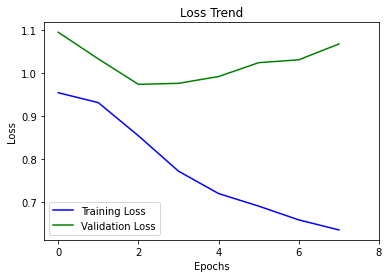

In [507]:
loss =Model_lCompined.history.history['loss']
val_loss = Model_lCompined.history.history['val_loss']

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Trend')
plt.plot(loss, 'blue', label='Training Loss')
plt.plot(val_loss, 'green', label='Validation Loss')
plt.xticks(range(0,10)[0::2])
plt.legend()
plt.show

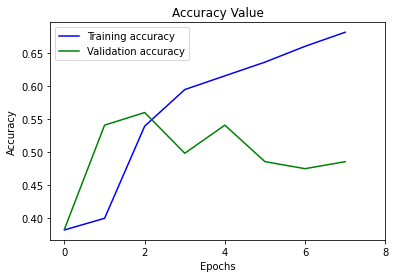

In [508]:
# summarize history for accuracy

acc = Model_lCompined.history.history['accuracy']
val_acc = Model_lCompined.history.history['val_accuracy']
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Value')
plt.plot(acc, 'blue', label='Training accuracy')
plt.plot(val_acc, 'green', label='Validation accuracy')
plt.xticks(range(0,10)[0::2])
plt.legend()
plt.show()

In [517]:
X_val_V22[0]

array([[ 0.06873617,  0.08042627, -0.03261937, ...,  0.01760437,
        -0.01342324, -0.11316463],
       [ 0.12473334,  0.01613627,  0.06206434, ..., -0.03017362,
        -0.08384965,  0.07986228],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

470/470 [==============================] - 2s 5ms/sample - loss: 0.9738 - accuracy: 0.5596
Score: 0.9738
Accuracy: 0.5596
[[149  45   0]
 [ 66 114   0]
 [ 65  31   0]]
              precision    recall  f1-score   support

           0       0.53      0.77      0.63       194
           1       0.60      0.63      0.62       180
           2       0.00      0.00      0.00        96

    accuracy                           0.56       470
   macro avg       0.38      0.47      0.41       470
weighted avg       0.45      0.56      0.50       470

0.5595744680851064


C:\Users\Mohammed\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mohammed\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mohammed\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

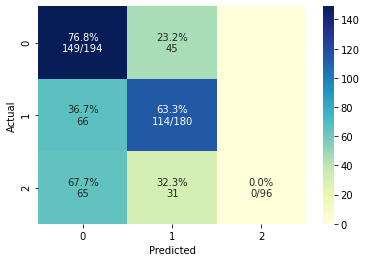

In [539]:
# Evaluate model

#x_test_Tf = np.array(x_test_Tf)
X_val_V22 = np.array(X_val_V22)

y_val_V22 = np.array(y_val_V22)
score, acc = Model_lCompined.evaluate(x=[x_test_Tf, X_val_V22],y= y_val_V22)

print('Score: %1.4f' % score)
print('Accuracy: %1.4f' % acc)

predictions = Model_lCompined.predict([x_test_Tf, X_val_V22])

print(confusion_matrix(y_val_V22.argmax(axis=1),predictions.argmax(axis=1)))  
print(classification_report(y_val_V22.argmax(axis=1),predictions.argmax(axis=1)))  
print(accuracy_score(y_val_V22.argmax(axis=1), predictions.argmax(axis=1)))
plot_cm( y_val_V22.argmax(axis=1),  predictions.argmax(axis=1))

#  ****  Start Here To Run Prediction and Load Trained Models  ****

In [540]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth',None)

In [541]:
## -- Word2Vec vectorizer class for classification
        
class WordVecVectorizer(object):
    def __init__(self, word2vec, max_len=30):
        self.word2vec = word2vec
        self.dim = word2vec.vector_size
        self.max_len = max_len

    def fit(self, X, y):
        return self    

    def transform(self, X):
        """
        Transforms a document to one vector of a size = word2vec.vector_size (dim), 
        by taking the mean of th vectors of every word.
        The output size will be of shape (X.shape[0], self.dim).
        """
        return np.array([
            np.mean([self.word2vec[w] for w in texts if w in self.word2vec]
                    or [1e-12 * np.random.normal(scale=0.6, size=self.dim)], axis=0)
            for texts in X
        ])
        
    def instance_transform(self, X):
        """
        Transforms a document to a 3D array based on the word2vec vector transformation of every instance (word),
        while the words that exceeds the maximum allowable length (max_len) will be removed.
        If the sentance is less than max_len, it will be padded with zeros.
        The output size will be of shape (X.shape[0], self.max_len, self.dim).
        """
        return np.array([
            [self.word2vec[w] if w in self.word2vec else 1e-12 * np.random.normal(scale=0.0, size=self.dim) for i, w in enumerate(texts.split()) if i<self.max_len] + [1e-12 * np.random.normal(scale=0.0, size=self.dim)]*(self.max_len-min(self.max_len, len(texts.split())))
            for texts in X
        ])


In [542]:
def clean_text(text):
    # remove tashkeel
    #text = strip_tashkeel(text)
    # text = qalsadi.lemmatizer.Lemmatizer(text)
    # remove repeated
    text = re.sub(r'(.)\1+', r'\1\1', text)
    text = text.replace('اا', 'ا').replace('وو', 'و').replace('يي', 'ي').replace('رر', 'ر')
    text = re.sub(r'((?<=\A)|(?<=\s))هه(?=\s|\Z)', r'ضحك', text)
    text = re.sub(r'ـ', '', text)
    # remove punctuations
    text = re.sub(r'[^\w\sؠ-ي١-٩]', ' ', text) # replace \w with \d to filter english letters
    text = re.sub(r'_', ' ', text)
    text = re.sub(r'/n', ' ', text)
    # unifying similar letters
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub('علے', 'على ', text)
    text = re.sub(r'ے', '', text)
    text = re.sub("[ؠىي]", "ي", text)
    # text = re.sub("يئ", "يء", text)
    text = re.sub("[ئؽؾؿ]", "ئ", text)# ء
    # text = re.sub("ؤ", "ء", text)
    # text = re.sub("ة", "ه", text)
    text = re.sub("[ؼػگ]", "ك", text)
    # separate negation signs
    text = re.sub(r'ما(\w+)ش', r'ما \1', text)
    text = re.sub(r'((?<=\A)|(?<=\s)|(?<=و))مش(?=\s)', r'ما', text)
    text = re.sub(r'((?<=\A)|(?<=\s)|(?<=و))ليش(?=\s)', r'ليه', text)
    text = re.sub(r'((?<=\A)|(?<=\s)|(?<=و))يا(?=\w)', r'يا ', text)
    text = re.sub('شاءالله', ' شاء الله', text)
    # remove slang begin marks
    text = re.sub(r'((?<=\A)|(?<=\s))ه(?=[ايت])', '', text)
#     text = re.sub('((?<=\s)|(?<=\A))(\w?ال)(?=\w{3,})', '', text)
#     text = re.sub('((?<=\s)|(?<=\A))(لل)(?=\w{3,})', '', text)
    # text = re.sub(r'((?<=\A)|(?<=\s))ب(?=[ايت])', '', text)
    # text = re.sub(r'((?<=\A)|(?<=\s))ا(?=[يت])', '', text)
    text = re.sub(r'[^a-zA-Z\sؠ-ي]', '', text)
    text = re.sub(r'[^\sؠ-ي]', ' ', text)
    return " ".join(text.split())

In [543]:
#stop words
st = ISRIStemmer()
stop=st.stop_words+stopwords.words("arabic")
stop=stop+['من','و','علي','اللي','ان','كان','شي','حتي','يعني','انه','فقط','وانا ','اني','ع','ب','طبعا','اي','قبل','انت','ليه','11','تم','وبعد','لكن','زي','م','لم','واللي','او','وقال','انها','انا','بلح','عم','ممكن','ايه','ده','عمو','دي','وانت','الي','ي','ف','طيب','عليكم','السلام','بس','عن','سمحت','رمضان','سنه',' ذالك','ص','اكتر','عشان','حاجه','كده','لو','احنا','ا','تاني','وانا','الا','دا','ال','ل','انك','د','ام','كنت','بقي','سنة','حق','كنت','وكل','ريت','كتير','ريت','حد','كم','لا','لكن','وما','لم','ما','الام', 'عايز' ,'طول' ,'يوم','اريد' ,'لوسمحت', 'الرد' ,'عندكم' ,'عندي' ,'جدا','ارجو','اية', 'فضلك','شهور', 'وفي', 'اذا', 'اقل', 'مفيش' , 'تحت', 'اذا', 'لان', 'حل', 'وعملت' , 'واحد', 'بقالي' ,'وبركاته' ,'موجود' ,'طب' ,'ينفع', 'قالي' ,'بقالي' ,'الان' ,'اخر' ,'علشان', 'عامل' ,'بسيط', 'شهر' ,'اخر', 'مثل', 'نتيجه', 'مجهود' ,'الافاده' ,'دلوقتي' ,'ماهو','سبب', 'تقريبا','خالص' ,'ايام', 'ورحمة', 'سن', 'مريض','لديكم','لاني','شويه','فترة','مين','لازم','كل','كمان'] 

In [544]:
def load_keras_model(model_name, path='SentimentModels'):
    data_path = os.path.join(path, model_name)
    with open(os.path.join(data_path, model_name+'_architecture.json'), 'r') as f:
        model = model_from_json(f.read())
    model.load_weights(os.path.join(data_path, model_name+'_weights.hdf5'))
    return model

**6. Use sentiment lexicon**

In [545]:
lexicon=pd.read_csv('SentimentModels/Full_lexicons.csv')

In [546]:
lexicon['lexicon'] = lexicon['lexicon'].astype(str)

In [547]:
lexicon['lexicon'] = lexicon['lexicon'].apply(lambda x: x.replace('_', ' '))

In [552]:
lexicon.head(10)

,lexicon,polarity,origin
0,ايد,1,KSA
1,ابارك,1,KSA
2,ابداع,1,KSA
3,ابسطنا,1,KSA
4,ابشركم,1,KSA
5,ابشرو,1,KSA
6,ابشروا,1,KSA
7,اتحدنا,1,KSA
8,اتشرف,1,KSA
9,اتلاف,1,KSA


In [549]:
Pos_Lexicon=lexicon[lexicon['polarity']==1]
Pos_Lexicon_list=list(Pos_Lexicon.lexicon)
Pos_Lexicon_list=[word for line in Pos_Lexicon_list for word in line.split()]
Neg_Lexicon=lexicon[lexicon['polarity']==-1]
Neg_Lexicon_list=list(Neg_Lexicon.lexicon)
Neg_Lexicon_list=[word for line in Neg_Lexicon_list for word in line.split()]

len(lexicon),len(Pos_Lexicon),len(Neg_Lexicon),len(Pos_Lexicon_list),len(Neg_Lexicon_list)

(8640, 1989, 6651, 2489, 8091)

In [553]:
#first Model BOW with LSTM
tok = joblib.load('SentimentModels/TokenizerBOW/TokForBOW.pkl')
BOW_LSTM_model=load_keras_model(model_name='SentimentBOW_LSTM')
#BOW_LSTM_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

##second Model TFIDF with ANN
vectorizer = joblib.load('SentimentModels/TFIDF/TFIDF_ForANN.pkl')
model_ANN_TFIDF=load_keras_model(model_name='Sentimentmodel_ANN')

##Third Model updated W2vec weight with LSTM
model_UpdatedW2vec_LSTM=load_keras_model(model_name='W2vecUpdated_LSTM')
word2vec_Updated = KeyedVectors.load_word2vec_format('SentimentModels/W2Vec/model_W2vec_CY_V2.bin', binary=True)
vec_Updated = WordVecVectorizer(word2vec_Updated)

##fourth Model old W2vec  with LSTM
model_OldW2vec_LSTM=load_keras_model(model_name='OldW2vec_LSTM')

word2vec_Old = KeyedVectors.load_word2vec_format('SentimentModels/W2Vec/w2v_model.bin', binary=True)
vec_Old = WordVecVectorizer(word2vec_Old)


def remove_Stopwords(sentence):
    temp_list=[]
    for word in sentence.split():
        if word not in stop:
            temp_list.append(word)
    sentence=' '.join(temp_list)
    return sentence
    
def remove_stopWord_clean(sentence):
    sentence=str(sentence)
    sentence=clean_text(sentence)
    sentence=remove_Stopwords(sentence)
    return sentence

def Predict_By_BOW_LSTM_model(sentence):     #Score 56 percentage
    sentence=remove_stopWord_clean(sentence)
    test_seq=pad_sequences(tok.texts_to_sequences([sentence]),maxlen=30)
    proba=BOW_LSTM_model.predict_proba(test_seq)
    proba1=proba.argmax(axis=1)[0]
    if proba1==0:
        return 'neg'
    elif proba1==1:
        return 'pos'
    else:
        return 'neu'
    
def Predict_By_model_ANN_TFIDF(sentence): #score 53 percentage
    sentence=str(sentence)
    sentence=remove_stopWord_clean(sentence)
    TFIDF_vector=vectorizer.transform([sentence])
    proba=model_ANN_TFIDF.predict_proba(TFIDF_vector)
    proba1=proba.argmax(axis=1)[0]
    if proba1==0:
        return 'neg'
    elif proba1==1:
        return 'pos'
    else:
        return 'neu'
    
def Predict_By_model_W2vecUpdated_LSTM(sentence):  #score 57
    sentence=str(sentence)
    sentence=remove_stopWord_clean(sentence)
    W2VecUpdate_vector=vec_Updated.instance_transform([sentence])
    proba=model_UpdatedW2vec_LSTM.predict(W2VecUpdate_vector)[0]
    proba1=np.argmax(proba)
    if proba1==0:
        return 'neg'
    elif proba1==1:
        return 'pos'
    else:
        return 'neu'
    
def Predict_By_model_OldW2vec_LSTM(sentence):  #score 58
    sentence=str(sentence)
    sentence=remove_stopWord_clean(sentence)
    W2VecOld_vector=vec_Old.instance_transform([sentence])
    proba=model_OldW2vec_LSTM.predict(W2VecOld_vector)[0]
    proba1=np.argmax(proba)
    if proba1==0:
        return 'neg'
    elif proba1==1:
        return 'pos'
    else:
        return 'neu',proba1

def jaccard_similarity_Pos_Lexicon(query):  #measure the similarity between each input text and all list_lexion
    intersection = set(query.split()).intersection(set(Pos_Lexicon_list))
    union = set(query.split()).union(set(Pos_Lexicon_list))
    return len(intersection)/len(union)

def jaccard_similarity_Neg_Lexicon(query):  #measure the similarity between each input text and all list_lexion
    intersection = set(query.split()).intersection(set(Neg_Lexicon_list))
    union = set(query.split()).union(set(Neg_Lexicon_list))
    return len(intersection)/len(union)

def Measure_similarity(query):
    query=str(query)
    Pos_Score=jaccard_similarity_Pos_Lexicon(query)
    Neg_Score=jaccard_similarity_Neg_Lexicon(query)
    
    if Pos_Score>Neg_Score:
        return 'pos'
    elif Pos_Score<Neg_Score:
         return 'neg'
    else:
        return 'neu'
        


In [580]:
def predict_Majourity(query):
    query=str(query)
    vote1=Measure_similarity(query)
    vote2=Predict_By_BOW_LSTM_model(query)
    vote3=Predict_By_model_ANN_TFIDF(query)
    vote4=Predict_By_model_W2vecUpdated_LSTM(query)
    vote5=Predict_By_model_OldW2vec_LSTM(query)
    allVote=[vote1,vote2,vote3,vote4,vote5]
    majority=max(set(allVote), key = allVote.count) #find majority element in a list
    
    return majority
def predict_Majourity_AllVots(query):
    query=str(query)
    vote1=Measure_similarity(query)
    vote2=Predict_By_BOW_LSTM_model(query)
    vote3=Predict_By_model_ANN_TFIDF(query)
    vote4=Predict_By_model_W2vecUpdated_LSTM(query)
    vote5=Predict_By_model_OldW2vec_LSTM(query)
    allVote=[vote1,vote2,vote3,vote4,vote5]
    majority=max(set(allVote), key = allVote.count) #find majority element in a list
    
    return majority,allVote    

In [586]:
predict_Majourity_AllVots('جميله ونظيفة')

('pos', ['pos', 'pos', 'pos', 'pos', 'pos'])

**predict text data**

In [567]:
df_Test=pd.read_csv("Final_Test.csv")

CY_trainTest=df_Test #for test the input
CY_trainTest.head()

,tweet,class
0,' @MaRwaEltantawy1 @MennaAshraf38 صح جدآ :( ',pos
1,' @muhamsalah صباحك ود وصفاء ',pos
2,' ربنا ينتقم من كل ظالم #معتقلي_الاتحادية ',neg
3,' مطلعين فرسة من صالة المطار قدامى .. ايه الجمال دا ',pos
4,' شهر(4) أكتر أكلة مفضلة عندك؟؟ ',neg


In [568]:
len(CY_trainTest)

400

In [569]:
predict_Majourity(CY_trainTest['tweet'].iloc[0])

'pos'

In [570]:
#build list of test text
test_list=list(CY_trainTest['tweet'])
len(test_list)

400

In [571]:
predict_list=[]
for sent in tqdm(range(len(test_list))):
    predict_list.append(predict_Majourity(test_list[sent]))

100%|███████████████████████████████████████████████████████████████████████| 400/400 [00:11<00:00, 35.61it/s]


In [572]:
CY_trainTest1=CY_trainTest.copy()

In [573]:
#creat new column with predicted values
CY_trainTest1['pred'] = np.asarray(predict_list).flatten()


In [574]:
CY_trainTest1.head(100)

,tweet,class,pred
0,' @MaRwaEltantawy1 @MennaAshraf38 صح جدآ :( ',pos,pos
1,' @muhamsalah صباحك ود وصفاء ',pos,pos
2,' ربنا ينتقم من كل ظالم #معتقلي_الاتحادية ',neg,pos
3,' مطلعين فرسة من صالة المطار قدامى .. ايه الجمال دا ',pos,pos
4,' شهر(4) أكتر أكلة مفضلة عندك؟؟ ',neg,neu
5,' رب واحد ايمان واحد معمودية واحدة http://t.co/fDZNoDrFqf ',neu,pos
6,' البنت دى و أمثالها لازم يغنوا و يملوا الكون بغناهم نغسي نعلى بقى و مصر ترجع زى زمان كلها فن و رقى.. ',pos,pos
7,' يا ابنى انتو وهو زمالك مين وانبى مين لسه فاضل 24ماتش الدورى بتاعنا يا خروف منك ليه #اﻻهلى ',neg,neg
8,' يا حبيبتي البعد ناار قلبي داب من الانتظار ♡ ',pos,pos
9,' سرعة البديهه و حسن التصرف المتلازمه الانجح و الاكثر ابهارا بنسبالي ',neu,pos


In [575]:
#mesure the differances or compare between 2 columns [class &pred]
CY_trainTest1['is_Similar'] = CY_trainTest1.apply(lambda x: x['class'] == x['pred'], axis=1)


In [576]:
CY_trainTest1.is_Similar.value_counts()

False    205
True     195
Name: is_Similar, dtype: int64

In [579]:
CY_trainTest1.to_csv('Final_TestWithPredict.csv',index=0)

In [578]:
#accuracy=
195/400*100

48.75